In [77]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
%matplotlib inline
import pandas as pd
import numpy as np

In [78]:
#read the dataset
df = pd.read_csv('Andhra_dataset2.csv')

In [79]:
#for the vizualizations please refer to:
#Please refer to -  https://www.kaggle.com/anushkini/lbw-feature-engineering?scriptVersionId=23972637
#take all the rows with 1
df_1 = df[df.reslt==1]
#take all the rows with 0
df_0 = df[df.reslt==0]
#impute with the mean
df_0.fillna(df_0.mean(), inplace = True)
df_1.fillna(df_1.mean(), inplace = True)
#join the datasets again
df = pd.concat([df_0, df_1])

#data imputation done!

C:\Users\Pradyumna\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


[0.8303933  0.11641374 0.02084962 0.0163332  0.00694599 0.00581415
 0.00217251 0.00107749 0.        ]


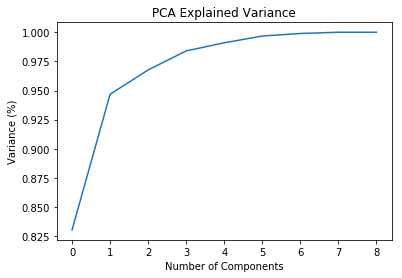

In [80]:
#method 1
from sklearn.decomposition import PCA
pca = PCA()

#shuffle the dataset so that we dont ahve skewed folds in the k folds
df = df.sample(frac=1, random_state = 828).reset_index(drop=True)
y  = df['reslt'].to_numpy()
X = df.drop(['reslt'],axis = 1)

pca.fit(X)
print(pca.explained_variance_ratio_)
#get the normalized importances
l = pca.explained_variance_ratio_/sum(pca.explained_variance_ratio_)  
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('PCA Explained Variance')
plt.show()

In [81]:
#now choose the first 3 components and perform PCA
pca = PCA(n_components = 3)
X = pca.fit_transform(X)
#THIS IS JUST TRYING IT OUT
df = df.sample(frac=1).reset_index(drop=True)
kf = KFold(n_splits=5)
gbdt = []
rf = []
ada = []
dnn = []
knn = []
nb = []
svms=[]
#perform k fold cross validation for all the models
for train_index, test_index in kf.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = RandomForestClassifier( max_depth=2)
    clf1 = GradientBoostingClassifier()
    clf2 = AdaBoostClassifier(n_estimators = 100)
    clf3 = MLPClassifier(solver='lbfgs', alpha=1e-3,
                    hidden_layer_sizes=(5, 5 ,5, 5, 3))
    neigh = KNeighborsClassifier(n_neighbors=3)
    svm = SVC(gamma='auto')
    svm.fit(X, y) 
    neigh.fit(x_train, y_train) 
    clf.fit(x_train,y_train)
    clf1.fit(x_train, y_train)
    clf2.fit(x_train, y_train)
    clf3.fit(x_train, y_train)

    dnn.append(accuracy_score(clf3.predict(x_test), y_test))
    gbdt.append(accuracy_score(clf1.predict(x_test), y_test))
    rf.append(accuracy_score(clf.predict(x_test), y_test))
    ada.append(accuracy_score(clf.predict(x_test), y_test))
    knn.append(accuracy_score(neigh.predict(x_test), y_test))
    svms.append(accuracy_score(svm.predict(x_test), y_test))

print("gbdt", sum(gbdt)/len(gbdt), gbdt)
print("random forest",sum(rf)/len(rf), rf)
print("adaboost",sum(ada)/len(ada), ada)
print("neural network", sum(dnn)/len(dnn), dnn)
print("knn", sum(knn)/len(knn), knn)
print("svm", sum(svms)/len(svms))

C:\Users\Pradyumna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Pradyumna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Pradyumna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Pradyumna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


gbdt 0.8423809523809525 [0.7619047619047619, 0.85, 0.8, 0.95, 0.85]
random forest 0.7933333333333333 [0.6666666666666666, 0.9, 0.8, 0.75, 0.85]
adaboost 0.7933333333333333 [0.6666666666666666, 0.9, 0.8, 0.75, 0.85]
neural network 0.7828571428571427 [0.7142857142857143, 0.85, 0.75, 0.65, 0.95]
knn 0.8909523809523808 [0.9047619047619048, 0.9, 0.85, 0.95, 0.85]
svm 0.9304761904761906


C:\Users\Pradyumna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [82]:
#normal test train split for pca
gbdt = []
rf = []
ada = []
dnn = []
knn = []
nb = []
svms=[]

x_train, x_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 132)
clf = RandomForestClassifier( max_depth=2)
clf1 = GradientBoostingClassifier()
clf2 = AdaBoostClassifier(n_estimators = 100)
clf3 = MLPClassifier(solver='lbfgs', alpha=1e-3,
                hidden_layer_sizes=(5, 5 ,5 , 2))
neigh = KNeighborsClassifier(n_neighbors=7)
svm = SVC(gamma='auto')
svm.fit(x_train, y_train) 
neigh.fit(x_train, y_train)
clf.fit(x_train,y_train)
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)

dnn.append(accuracy_score(clf3.predict(x_test), y_test))
gbdt.append(accuracy_score(clf1.predict(x_test), y_test))
rf.append(accuracy_score(clf.predict(x_test), y_test))
ada.append(accuracy_score(clf.predict(x_test), y_test))
knn.append(accuracy_score(neigh.predict(x_test), y_test))
svms.append(accuracy_score(svm.predict(x_test), y_test))

print(list(y_train).count(0))
print("gbdt", sum(gbdt)/len(gbdt))
print("random forest",sum(rf)/len(rf))
print("adaboost",sum(ada)/len(ada))
print("neural network", sum(dnn)/len(dnn))
print("knn", sum(knn)/len(knn))
print("svm", sum(svms)/len(svms))

C:\Users\Pradyumna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


22
gbdt 0.8095238095238095
random forest 0.9047619047619048
adaboost 0.9047619047619048
neural network 0.9523809523809523
knn 0.9523809523809523
svm 0.9523809523809523


In [83]:
#as we see, kNN model seems to be performing the best for this dataset. 
#this is probably dure to the small size of the dataset.

In [84]:
#method 2

X = df.drop(['reslt'],axis = 1).to_numpy()
y = df['reslt'].to_numpy()
model = ExtraTreesClassifier(n_estimators=10, random_state =28)
model.fit(X, y)
df.drop(['reslt'],axis = 1)
x = model.feature_importances_
x = x/np.sum(x)
x = x*100
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop(['reslt'],axis = 1))
X = X*x
y = df['reslt'].to_numpy()

In [92]:
kf = KFold(n_splits=5, shuffle = True)
gbdt = []
rf = []
ada = []
dnn = []
knn = []
nb = []
svms=[]
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
   
    x_train, x_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    clf = RandomForestClassifier( max_depth=2)
    clf1 = GradientBoostingClassifier()
    clf2 = AdaBoostClassifier(n_estimators = 100)
    clf3 = MLPClassifier(solver='lbfgs', alpha=1e-3,
                    hidden_layer_sizes=(5, 5 ,5 , 2))
    neigh = KNeighborsClassifier(n_neighbors=7)
    mnb = GaussianNB()
    svm = SVC(gamma='auto')
    svm.fit(x_train, y_train) 
    neigh.fit(x_train, y_train)
    clf.fit(x_train,y_train)
    clf1.fit(x_train, y_train)
    clf2.fit(x_train, y_train)
    clf3.fit(x_train, y_train)
    mnb.fit(x_train, y_train)

    dnn.append(accuracy_score(clf3.predict(x_test), y_test))
    gbdt.append(accuracy_score(clf1.predict(x_test), y_test))
    rf.append(accuracy_score(clf.predict(x_test), y_test))
    ada.append(accuracy_score(clf.predict(x_test), y_test))
    knn.append(accuracy_score(neigh.predict(x_test), y_test))
    nb.append(accuracy_score(mnb.predict(x_test), y_test))
    svms.append(accuracy_score(svm.predict(x_test), y_test))

print("gbdt", sum(gbdt)/len(gbdt), gbdt)
print("random forest",sum(rf)/len(rf), rf)
print("adaboost",sum(ada)/len(ada), ada)
print("neural network", sum(dnn)/len(dnn), dnn)
print("knn", sum(knn)/len(knn), knn)
print("mnb", sum(nb)/len(nb), nb)
print("svm", sum(svms)/len(svms))

C:\Users\Pradyumna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Pradyumna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Pradyumna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Pradyumna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Pradyumna\Anaconda3\lib\site-packages\sklearn\ensem

gbdt 0.8414285714285714 [0.8571428571428571, 0.8, 0.85, 0.9, 0.8]
random forest 0.8314285714285713 [0.8571428571428571, 0.7, 0.85, 0.9, 0.85]
adaboost 0.8314285714285713 [0.8571428571428571, 0.7, 0.85, 0.9, 0.85]
neural network 0.8123809523809523 [0.7619047619047619, 0.85, 0.85, 0.85, 0.75]
knn 0.8914285714285715 [0.8571428571428571, 0.8, 0.85, 0.95, 1.0]
mnb 0.7414285714285714 [0.8571428571428571, 0.45, 0.8, 0.85, 0.75]
svm 0.7823809523809524


In [86]:
#as we see, kNN is performing the best.
#our kNN model 
#we have used euclidean distance here
def distance(v1, v2):
    return np.sum(np.sqrt(np.abs(np.square(v1)-np.square(v2))))
def getKNNpredictions(X_train,y_train, X_test, k):
    #append the y values to the columns for simplicity when sorting
    X_train = np.append(X_train,y_train.reshape(-1,1),axis = 1)
    predictions = []
    X_train = list(X_train)
    ncols = len(X_train[0])
    #loop through the test set and make predictions for each one seperately
    for i in X_test:
        #sort the train set based on the distance from this distance
        sortlist = sorted(X_train, key = lambda x: distance(x[:ncols-1], i))
        #choose the k nearest ones
        knearest = np.asarray(sortlist[:k])
        #append the prediction to the result array
        #here, bincount returns the mode of the list of integers
        predictions.append(np.bincount(np.asarray(knearest[:,ncols-1], np.int64)).argmax())
    return np.asarray(predictions)

In [87]:
#5 fold cross validation on our kNN model
kf = KFold(n_splits=5, shuffle = True)
knn = []
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    x_train, x_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    knn.append(accuracy_score(getKNNpredictions(x_train,y_train, x_test,7), y_test))
print(sum(knn)/len(knn))

0.911904761904762


In [89]:
#Normal validation on the kNN:
knn = []
x_train,x_test,y_train,y_test = train_test_split(X,y)
knn.append(accuracy_score(getKNNpredictions(x_train,y_train, x_test,7), y_test))
print(sum(knn)/len(knn))

1.0


In [93]:
X_test = np.asarray([np.asarray([3,75,80,1,4,1,1.375,5,1])])

In [95]:
getKNNpredictions(X, y, X_test, 7)

array([1], dtype=int64)